In [1]:
import pickle
import os
import pandas as pd
import numpy as np
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
with open('C:/Users/Lympha/Desktop/temp_dir/result_dataframes/rmsd_dictionary.pickle', 'br') as f:
    dict_rmsd = pickle.load(f)
    
print(dict(list(dict_rmsd.items())[:10]))

{('c_4K81.pdb', 'c_4K81.pdb'): 0, ('c_4K81.pdb', 'c_7JIH.pdb'): 14.033130149065755, ('c_4K81.pdb', 'c_2IEZ.pdb'): 21.504278496058618, ('c_4K81.pdb', 'c_521P.pdb'): 1.0826094846941288, ('c_4K81.pdb', 'c_4UJ4.pdb'): 3.990765055400544, ('c_4K81.pdb', 'c_5VCU.pdb'): 4.077787574931696, ('c_4K81.pdb', 'c_6ZAY.pdb'): 2.657268943319466, ('c_4K81.pdb', 'c_8EBZ.pdb'): 15.501490161581785, ('c_4K81.pdb', 'c_4EPX.pdb'): 2.0401116890110833, ('c_4K81.pdb', 'c_1N6N.pdb'): 3.7289540229558273}


In [3]:
structures = sorted(set([item for sublist in dict_rmsd.keys() for item in sublist]))

In [4]:
rmsd_matrix = np.zeros((len(structures), len(structures)))

In [5]:
large_number = np.max([v for v in dict_rmsd.values() if np.isfinite(v)]) * 10

In [6]:
for key, value in dict_rmsd.items():
    i, j = structures.index(key[0]), structures.index(key[1])
    if np.isnan(value):
        rmsd_matrix[i][j] = large_number
        rmsd_matrix[j][i] = large_number
    else:
        rmsd_matrix[i][j] = value
        rmsd_matrix[j][i] = value  # the matrix is symmetric

In [7]:
rmsd_condensed = squareform(rmsd_matrix)

print(rmsd_condensed)

[ 5.20472519  4.96737935 15.08071712 ... 14.60096534  5.37423136
 13.51334084]


In [8]:
Z = linkage(rmsd_condensed, method='ward')

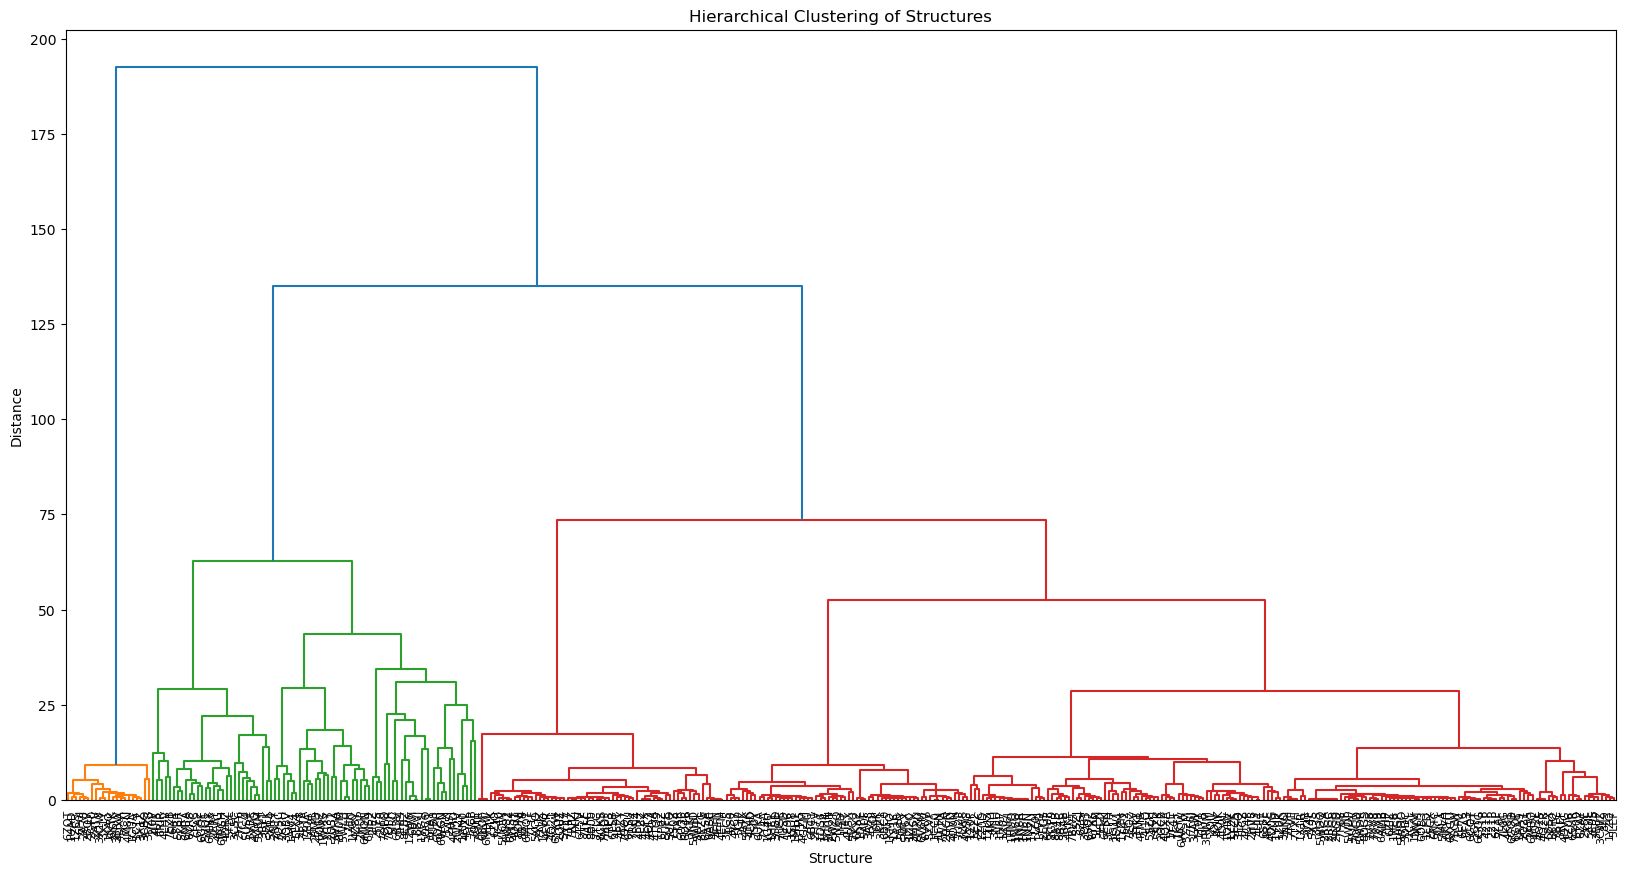

In [9]:
plt.figure(figsize=(20, 10))


structure_labels = [item.split('.')[0].split('_')[1] for item in structures]
dendrogram(Z, labels=structure_labels, leaf_rotation=90, leaf_font_size=8)


plt.title('Hierarchical Clustering of Structures')
plt.xlabel('Structure')
plt.ylabel('Distance')


plt.show()

In [10]:
metadata_df = pd.read_csv('C:/Users/Lympha/Desktop/temp_dir/result_dataframes/metadata_dataframe.csv', index_col=0)

dict_activity = {protein: metadata_df.loc[protein, "Read Activity Status"] for protein in metadata_df.index}
dict_activity
    
print(dict_activity)

{'1A2B': 'inactive', '1AA9': 'inactive', '1AGP': 'active', '1AM4': 'active', '1AN0': 'inactive', '1C1Y': 'active', '1CC0': 'inactive', '1DPF': 'inactive', '1DS6': 'inactive', '1E96': 'active', '1FTN': 'inactive', '1G17': 'active', '1G4U': 'inactive', '1GUA': 'active', '1HE1': 'inactive', '1HE8': 'active', '1HH4': 'inactive', '1HUQ': 'active', '1I4D': 'inactive', '1I4T': 'active', '1KAO': 'inactive', '1KMQ': 'active', '1KY2': 'active', '1LF0': 'active', '1LFD': 'active', '1MH1': 'active', '1N6H': 'active', '1N6I': 'inactive', '1N6N': 'active', '1N6O': 'active', '1N6P': 'active', '1N6R': 'active', '1NVV': 'active', '1OIV': 'inactive', '1OIW': 'inactive', '1S1C': 'active', '1T91': 'active', '1TU3': 'active', '1TX4': 'inactive', '1UAD': 'active', '1VG0': 'inactive', '1VG1': 'inactive', '1WMS': 'inactive', '1X1R': 'inactive', '1XTQ': 'inactive', '1YU9': 'active', '1YVD': 'active', '1YZK': 'active', '1YZL': 'active', '1YZN': 'active', '1YZQ': 'active', '1YZU': 'active', '1Z06': 'active', '1Z

In [11]:
label_colors = {"active": "r", "inactive": "b"}
leaf_colors = [label_colors[dict_activity[structure_id[2:-4]]] for structure_id in structures]
print(leaf_colors)

['b', 'b', 'r', 'r', 'b', 'r', 'b', 'b', 'b', 'r', 'b', 'r', 'b', 'r', 'b', 'r', 'b', 'r', 'b', 'r', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'r', 'r', 'r', 'b', 'r', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'r', 'r', 'b', 'r', 'r', 'b', 'r', 'r', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'r', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'r', 'r', 'r', 'r', 'b', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'r', 'r', 'r', 'r', 'r', 'b', 'r', 'b', 'r', 'b', 'r', 'r', 'b', 'r', 'b', 'r', 'r', 'r', 'b', 'r', 'r', 'r', 'r', 'b', 'r', 'b', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'r', 'b', 'r', 'r', 'r', 'b', 'b', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'r', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'b', 'r', 'r', 'b', 'r',

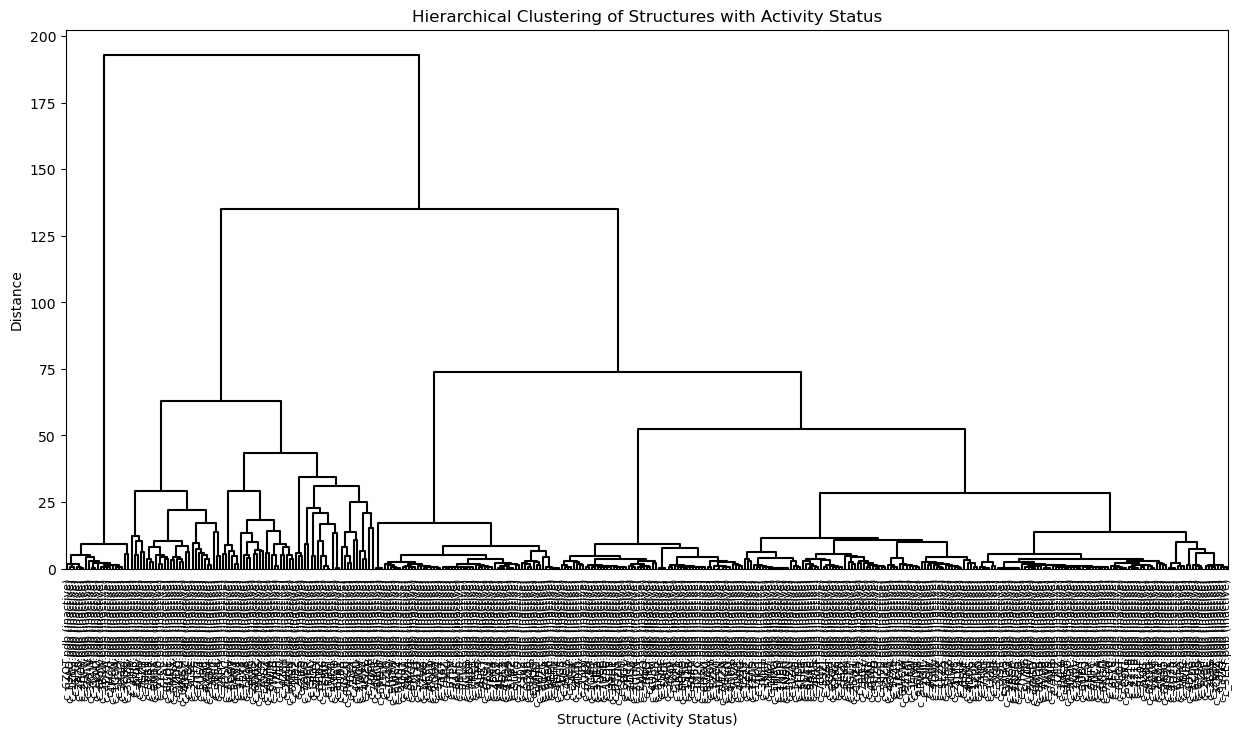

In [12]:
plt.figure(figsize=(15, 7))


dendrogram(Z, labels=structure_labels, leaf_rotation=90, leaf_font_size=8, color_threshold=0,
           link_color_func=lambda k: 'black', leaf_label_func=lambda v: f"{structures[v]} ({'active' if leaf_colors[v] == 'g' else 'inactive'})")


plt.title('Hierarchical Clustering of Structures with Activity Status')
plt.xlabel('Structure (Activity Status)')
plt.ylabel('Distance')


plt.show()

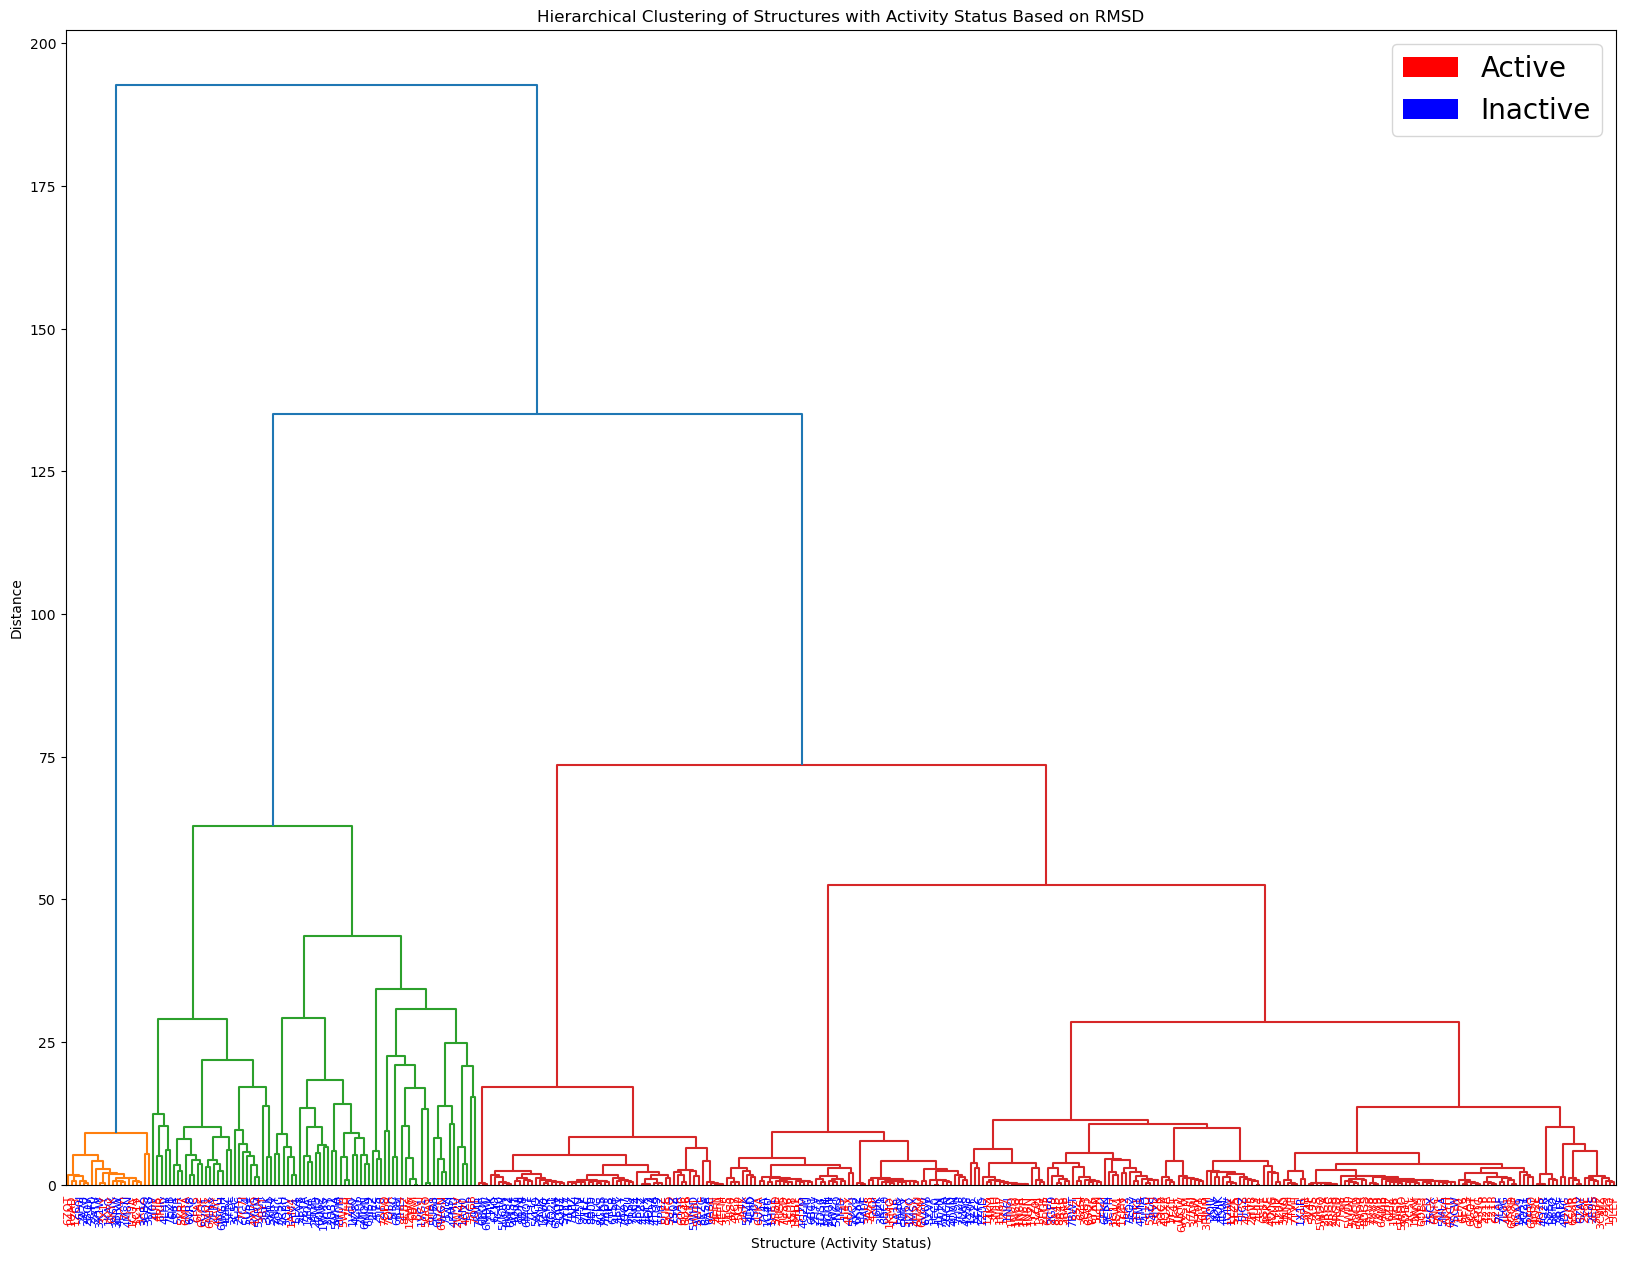

In [15]:
plt.figure(figsize=(20, 15))


dendro = dendrogram(Z, labels=structure_labels, leaf_rotation=90, leaf_font_size=8)


plt.title('Hierarchical Clustering of Structures with Activity Status Based on RMSD')
plt.xlabel('Structure (Activity Status)')
plt.ylabel('Distance')


labels = plt.gca().get_xmajorticklabels()


legend_elements = [Patch(facecolor='r', label='Active'),
                   Patch(facecolor='b', label='Inactive')]


plt.legend(handles=legend_elements, loc='upper right', fontsize='20') 


for label in labels:
    label.set_color(label_colors[dict_activity[label.get_text()]])

plt.show()